### Assignment
Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated from the images, as described below:

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
cancer = pd.read_csv("cancer.data", header = None)

In [15]:
# changing index cols with rename() 
cancer = cancer.rename(columns = {"0": "Sample_code_number", 
                                  "1": "Clump_Thickness", 
                                  "2": "Uniformity_of_Cell_Size",
                                  "3": "Uniformity_of_Cell_Shape",
                                  "4": "Marginal_Adhesion",
                                  "5": "Single_Epithelial_Cell_Size",
                                  "6": "Bare_Nuclei",
                                  "7": "Bland_Chromatin",
                                  "8": "Normal_Nucleoli",
                                  "9": "Mitoses",
                                  "10": "Class"}) 
  
# changing columns using .columns() 
cancer.columns = ["Sample_code_number", 
                     "Clump_Thickness", 
                     "Uniformity_of_Cell_Size", 
                     "Uniformity_of_Cell_Shape", 
                     "Marginal_Adhesion", 
                     "Single_Epithelial_Cell_Size", 
                     "Bare_Nuclei", 
                     "Bland_Chromatin", 
                     "Normal_Nucleoli", 
                     "Mitoses", 
                     "Class"]
cancer.columns

Index(['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [16]:
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [17]:
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cancer:
    if cancer[col].dtype == 'object':
        cancer[col] = le.fit_transform(cancer[col])

In [18]:
cancer["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [19]:
cancer.groupby("Class").mean()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,0.707424,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,2.767635,5.979253,5.863071,2.589212


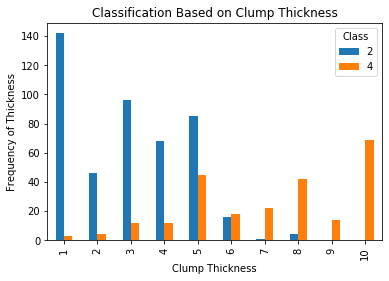

In [20]:
pd.crosstab(cancer["Clump_Thickness"], cancer["Class"]).plot(kind = 'bar')
plt.title('Classification Based on Clump Thickness')
plt.xlabel('Clump Thickness')
plt.ylabel('Frequency of Thickness')
plt.savefig('clump_thick')

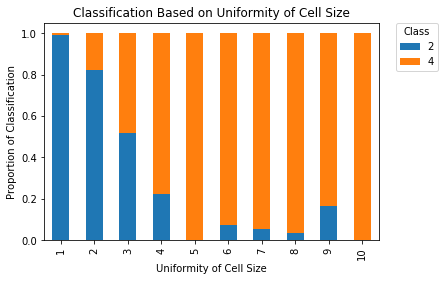

In [21]:
table = pd.crosstab(cancer["Uniformity_of_Cell_Size"], cancer["Class"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Classification Based on Uniformity of Cell Size')
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Proportion of Classification')
plt.savefig('mariral_vs_pur_stack')

/home/phathu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


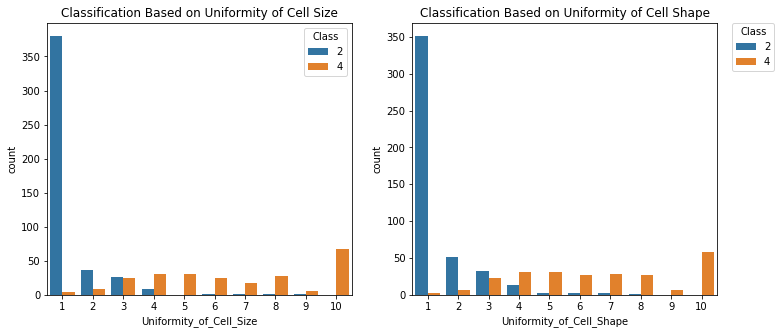

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.countplot(x = "Uniformity_of_Cell_Size", hue = "Class", data = cancer, ax = ax[0])
sns.countplot(x = "Uniformity_of_Cell_Shape", hue = "Class", data = cancer, ax = ax[1])
ax[0].legend(title = 'Class', loc = "upper right")
ax[1].legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
ax[0].set_title("Classification Based on Uniformity of Cell Size")
ax[1].set_title("Classification Based on Uniformity of Cell Shape")
fig.show()

In [23]:
# convert the DataFrame to a NumPy array
cancer = cancer.values

# Segregate features and labels into separate variables
X, y = cancer[:,0:10] , cancer["Class"]

# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices